In [1]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor()])

# Download and load the training data
trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_dl = DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_dl = DataLoader(testset, batch_size=64, shuffle=False)

# Check the sizes of the datasets
print(f'Training set size: {len(trainset)}')
print(f'Test set size: {len(testset)}')

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:06<00:00, 1595737.54it/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 110403.38it/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:04<00:00, 399980.46it/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 4089851.60it/s]

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw

Training set size: 60000
Test set size: 10000


In [5]:
trainset.data.shape

torch.Size([60000, 28, 28])

In [8]:
import torch.nn as nn

model = nn.Sequential(
    nn.Flatten(start_dim=1, end_dim=-1), # keep 1st dimension (batch size), flatten the rest
    nn.Linear(28*28, 128, bias=True),
    nn.ReLU(),
    nn.Linear(128, 64, bias=True),
    nn.ReLU(),
    nn.Linear(64, 10, bias=True)
)

print(model)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=128, bias=True)
  (2): ReLU()
  (3): Linear(in_features=128, out_features=64, bias=True)
  (4): ReLU()
  (5): Linear(in_features=64, out_features=10, bias=True)
)


In [9]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

torch.manual_seed(1)
num_epochs = 10

train_loss_history = []
train_acc_history = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    for images, labels in train_dl:
        optimizer.zero_grad()
        outputs = model(images)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    epoch_loss = running_loss / len(train_dl)
    epoch_acc = correct / total
    train_loss_history.append(epoch_loss)
    train_acc_history.append(epoch_acc)
    
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}')

Epoch 1/10, Loss: 0.3313, Accuracy: 0.9067
Epoch 2/10, Loss: 0.1363, Accuracy: 0.9594
Epoch 3/10, Loss: 0.0944, Accuracy: 0.9712
Epoch 4/10, Loss: 0.0721, Accuracy: 0.9777
Epoch 5/10, Loss: 0.0575, Accuracy: 0.9819
Epoch 6/10, Loss: 0.0457, Accuracy: 0.9857
Epoch 7/10, Loss: 0.0357, Accuracy: 0.9886
Epoch 8/10, Loss: 0.0303, Accuracy: 0.9901
Epoch 9/10, Loss: 0.0267, Accuracy: 0.9913
Epoch 10/10, Loss: 0.0203, Accuracy: 0.9937


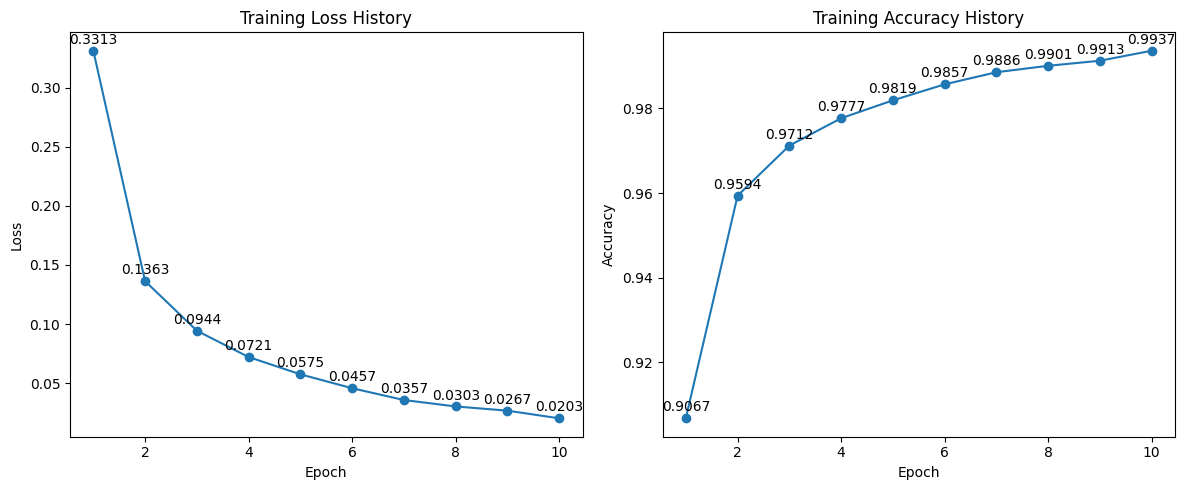

In [11]:
import matplotlib.pyplot as plt

# Plot training loss history
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_loss_history, marker='o')
plt.title('Training Loss History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
for i, value in enumerate(train_loss_history):
    plt.annotate(f'{value:.4f}', (i + 1, value), textcoords="offset points", xytext=(0, 5), ha='center')

# Plot training accuracy history
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_acc_history, marker='o')
plt.title('Training Accuracy History')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
for i, value in enumerate(train_acc_history):
    plt.annotate(f'{value:.4f}', (i + 1, value), textcoords="offset points", xytext=(0, 5), ha='center')

plt.tight_layout()
plt.show()

In [12]:
model.eval()
test_loss = 0.0
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_dl:
        outputs = model(images)
        loss = loss_fn(outputs, labels)
        test_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_loss /= len(test_dl)
test_accuracy = correct / total

print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

Test Loss: 0.0942, Test Accuracy: 0.9756
